# Data Analytics - Challenge


The goal of this challenge is to analyze a restaurant invoices.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

---

❓ Display the 10 first rows of the dataset (no need to sort)


In [3]:
# Your code here
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


---

❓ How many days per week is the restaurant open?


In [13]:
# Your code here
#print('the restaurant is open ' + str(len(tips_df.day.unique()) + ' days of the week')
len(tips_df.day.unique())

opened_days = tips_df.day.unique()


4

---

❓ What day of the week is there more bills? Plot this with a Seaborn Countplot.


<AxesSubplot:xlabel='day', ylabel='count'>

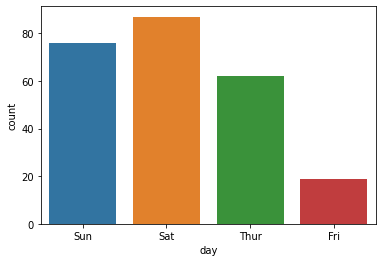

In [22]:
# Your code here
#day of the week with max bills 
tips_df['day'].value_counts().head(1)


#plot it with seaborn Countplot
sns.countplot(x='day',data = tips_df)


<AxesSubplot:xlabel='sex', ylabel='count'>

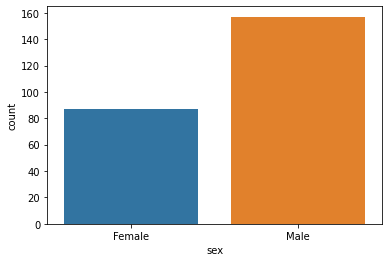

In [23]:
# More plots 

#plot the sex 
sns.countplot(x='sex', data = tips_df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

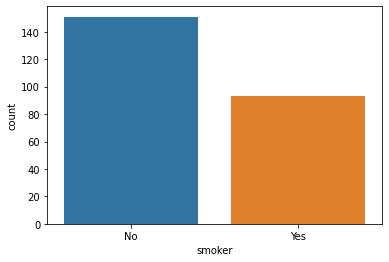

In [24]:
#plot depending on the smoker 
sns.countplot(x='smoker', data = tips_df)

---

❓ Try to do some other countplots, varying `x` with one of the categorical column (`sex`, `smoker`, `time`)

<AxesSubplot:xlabel='time', ylabel='count'>

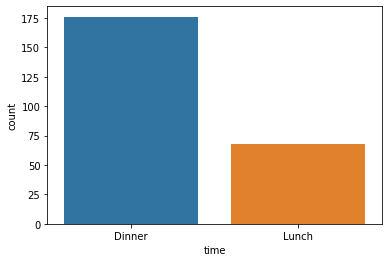

In [25]:
#plot depending on the time 
sns.countplot(x='time', data = tips_df)

---
❓ Let's plot the distribution of `total_bill` based on a given category. Start with `day`:

```python
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
```

1. Change the value of `x` with one of the categorical column of the dataset and the value of `kind` (`"bar"`, `"box"`, `"violin"`, `"boxen"`)
1. Change the value of `y` with one of the numerical column of the dataset

Text(0.5, 0.98, 'Boxen chart for total distribution of total_bill based on smoker ')

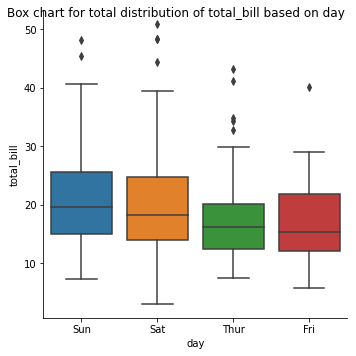

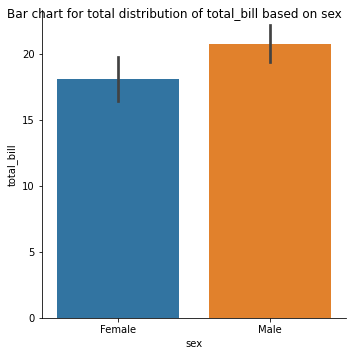

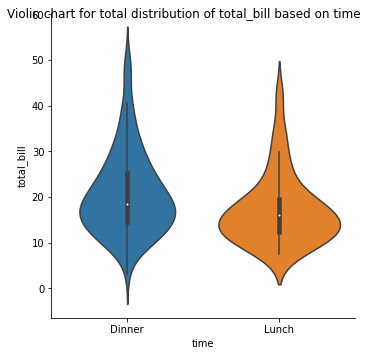

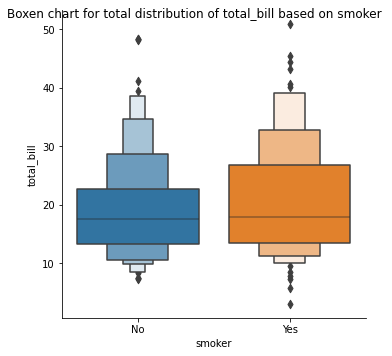

In [37]:
# Your experiments here

 #total distribution of total_bill based on day 
totalBill_on_days_box = sns.catplot(data= tips_df, x='day', y='total_bill', kind="box")

totalBill_on_days_box.fig.suptitle('Box chart for total distribution of total_bill based on day ') 

 # ----- based on sex
totalBill_on_sex_bar = sns.catplot(data = tips_df, x="sex", y='total_bill', kind="bar")
totalBill_on_sex_bar.fig.suptitle('Bar chart for total distribution of total_bill based on sex ') 

 #-------based on time 
totalBill_on_time_violin = sns.catplot(data = tips_df, x="time", y='total_bill', kind="violin")
totalBill_on_time_violin.fig.suptitle('Violin chart for total distribution of total_bill based on time ') 

 #-------based on smoker or no
totalBill_on_time_boxen = sns.catplot(data = tips_df, x="smoker", y='total_bill', kind="boxen")
totalBill_on_time_boxen.fig.suptitle('Boxen chart for total distribution of total_bill based on smoker ')
    



---
❓ Let's use [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `col` in the first line with another column (e.g. `"time"`). Run the cell again. What do you observe?

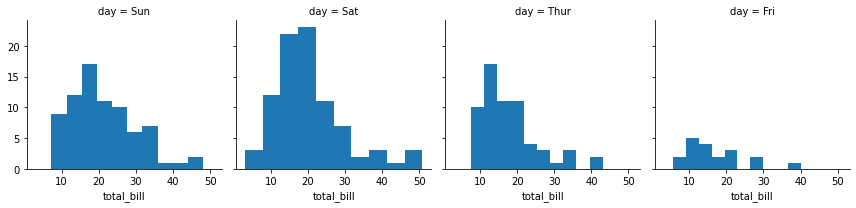

In [38]:
g = sns.FacetGrid(tips_df, col="day")
g.map(plt.hist, "total_bill")

we observe that there are more 20 bills on saturday

---
❓ Let's continue with FacetGrid and add a `row="smoker"` parameter. How many cells do you get in the plot?

<details>
    <summary>🙈 Reveal solution</summary>

You get 2 * 4 = 8 cells!
    
<pre>
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
</pre>
</p>
</details>

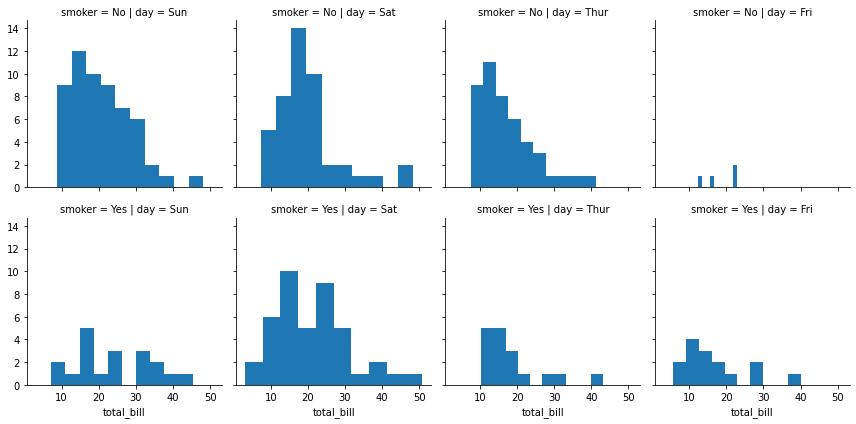

In [39]:
# Your code here
g = sns.FacetGrid(tips_df, col="day",row="smoker")
g.map(plt.hist, "total_bill")

we notice that we got 8 cells in our plot

## Correlation

Let's start looking for correlation between columns in the dataset.


---
❓ What is your intuition about the relationship between the columns `tip` and `total_bill`?

my intuition is that the bigger is the total_bill, the bigger is the tip

---
❓ Let's look at the data to see if our intuition is correct. We will do a **scatterplot** with `x` being `total_bill` and `y` the tip.

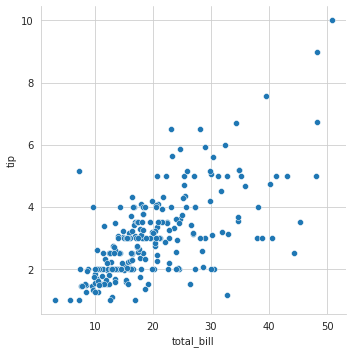

In [40]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)
    


In [43]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
tips_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

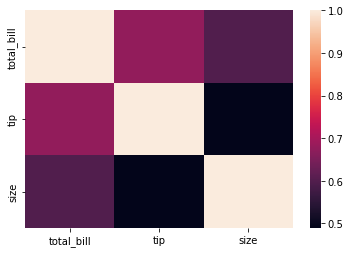

In [45]:
#display that in a heatmap
sns.heatmap(tips_df.corr())

---
❓ Another way of looking at this data is to use a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

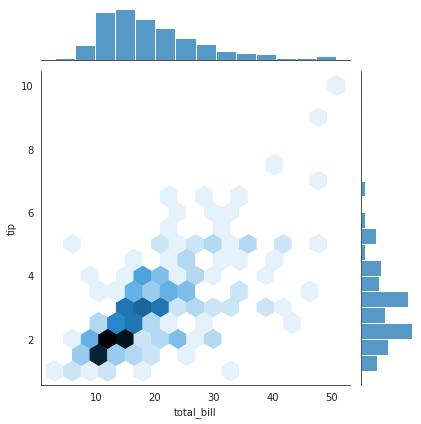

In [46]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips_df)

❓ A very useful tool to **identify** correlations is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

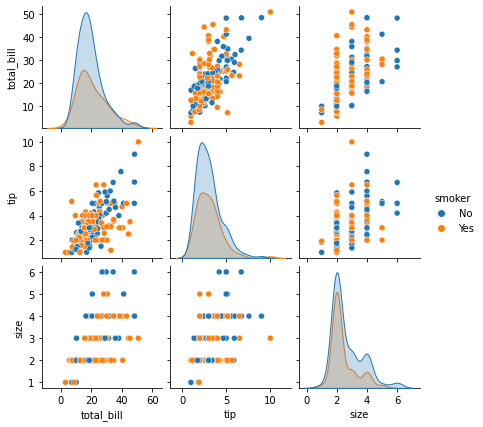

In [47]:
sns.pairplot(tips_df, height=2, hue="smoker")

## Regression

We are not doing Machine Learning yet but we can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation between two columns:

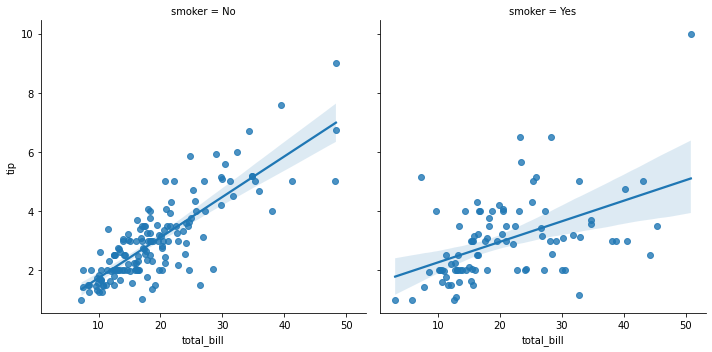

In [48]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips_df)

## end